# Regression Project

## File IO

Only File IO...

You may not change this code.

In [12]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

tk_window = tkinter.Tk()
cwd = os.getcwd()

tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))

tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))

tr_ans = tr_ans.iloc[:, 0]

ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

tk_window.destroy()



## Predict Algorithm

Type your source code (Champion Algorithm)

In [13]:
import numpy as np

#Delete String columns
string_columns = tr_data.dtypes
string_boolidx = string_columns == np.object

tr_data_num = tr_data.drop(tr_data.columns[string_boolidx], axis=1)
ts_data_num = ts_data.drop(ts_data.columns[string_boolidx], axis=1)


#delete NaN columns
tr_nan_idx = tr_data_num.isna().any()
ts_nan_idx = ts_data_num.isna().any()

total_nan_idx = np.logical_or(tr_nan_idx, ts_nan_idx)

tr_data_pre = tr_data_num.drop(tr_data_num.columns[total_nan_idx], axis=1)
ts_data_pre = ts_data_num.drop(ts_data_num.columns[total_nan_idx], axis=1)


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

rg = GradientBoostingRegressor(max_depth = 4, learning_rate = 0.012100000000000003, random_state=42, n_estimators=994, criterion= 'mse')
rg.fit(tr_data_pre, tr_ans)

y_pred = rg.predict(ts_data_pre)


pred_df = pd.DataFrame(y_pred)

pred_df.to_csv("output.csv", mode='w')

## Check Accuracy

Only for check accuracy

In [15]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

tk_window = tkinter.Tk()
cwd = os.getcwd()
ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
ts_ans = ts_ans.iloc[:, 0]
tk_window.destroy()

print(rmse(ts_ans, y_pred))

20601.195541934147


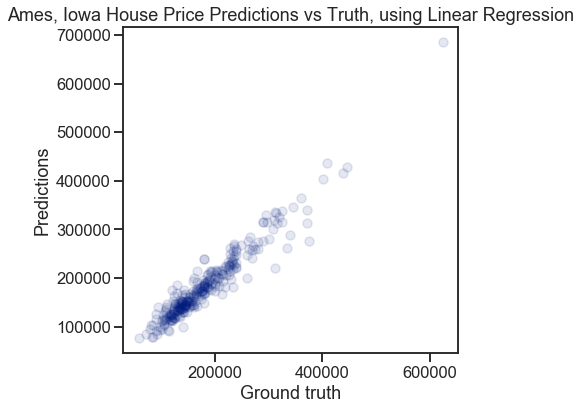

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f = plt.figure(figsize =(6,6))

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(ts_ans, y_pred, alpha=.1)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');